In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Image

# Make sure that caffe is on the python path:
caffe_root = '/home/abhinav/Softwares/caffe/'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

# configure plotting
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [14]:
caffe.set_mode_gpu()
color_net = caffe.Net('/home/abhinav/ann_project/code/imagenet_model_alexnet/deploy.prototxt', 
                      '/media/data/abhinav/ann_project_data/ImageNet_trained_models_resized_alexnet/alexnet_imagenet_iter_440000.caffemodel',
                      caffe.TEST)


In [15]:
print("blobs {}\nparams {}".format(color_net.blobs.keys(), color_net.params.keys()))


blobs ['data', 'conv1', 'norm1', 'pool1', 'conv2', 'norm2', 'pool2', 'conv3', 'conv4', 'conv5', 'pool5', 'fc6', 'fc7', 'fc8', 'prob']
params ['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8']


In [21]:
# input preprocessing: 'data' is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': color_net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

(-0.5, 226.5, 226.5, -0.5)

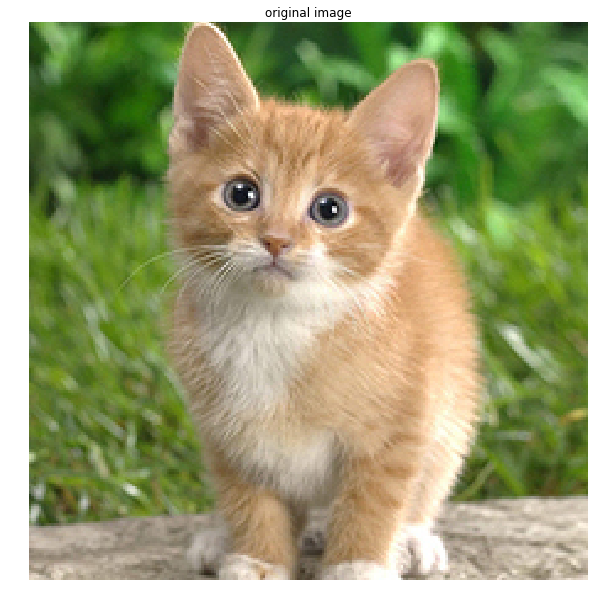

In [22]:
# load image and prepare as a single input batch for Caffe
im = np.array(Image.open('/home/abhinav/Softwares/caffe/examples/images/cat_227.jpg'))
color_net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image('/home/abhinav/Softwares/caffe/examples/images/cat_227.jpg'))
plt.title("original image")
plt.imshow(im)
plt.axis('off')

In [23]:
#print(color_net.blobs['data'].shape())
#print(color_net.blobs['data'].data.shape)
#im_input = im[np.newaxis, np.newaxis, :, :]
#print(im_input.shape)
#im_input = np.swapaxes(im_input, 1, 4)
#print(im_input.shape)
#im_input = im_input.reshape(1, 3, 227, 227)
#print(im_input.shape)
#im_input = np.append(im_input, im_input, axis=0)
#im_input = np.append(im_input, im_input, axis=0)
#im_input = np.append(im_input, im_input, axis=0)
#im_input = np.append(im_input, im_input[0:2, :,  : , :], axis=0)

#print(im_input.shape)

#color_net.blobs['data'].reshape(*im_input.shape)
#color_net.blobs['data'].data[...] = im_input
print(color_net.blobs['data'].data.shape)

(10, 3, 227, 227)


-0.0
2033.08


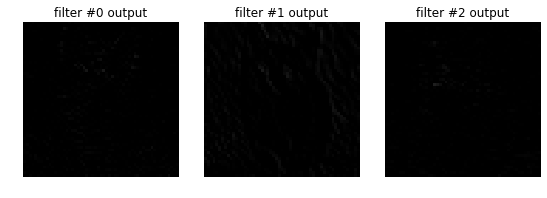

In [27]:
def show_filters(net):
    net.forward()
    plt.figure()
    filt_min, filt_max = net.blobs['conv1'].data.min(), net.blobs['conv1'].data.max()
    print(filt_min)
    print(filt_max)
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.title("filter #{} output".format(i))
        plt.imshow(net.blobs['conv1'].data[0, i+45], vmin=filt_min, vmax=filt_max)
        plt.tight_layout()
        plt.axis('off')

# filter the image with initial 
show_filters(color_net)

In [ ]:
print(color_net.blobs['conv1'].data[0].shape)